# BeautifulSoup


Beautiful Soup ist eine freie Screen Scraping-Software und eine Bibliothek für Python. Mit BS kann man einfach URLs öffnen und diese nach bestimmten Daten durchsuchen. Man nennt das [Scrapen](https://de.wikipedia.org/wiki/Screen_Scraping). Wir beginnen unser kleines Tutorial zunächst mit dem import der Bibliothek BeautifulSoup:

In [52]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

Danach öffnen wir den Browser mit einer spezifischen Instagram URL

In [53]:
driver = webdriver.Firefox()
driver.get("https://www.instagram.com/explore/tags/shit/")
time.sleep(2)

Im nächsten Schritt speichern wir den gesamten Sourcecode der Seite in einer Variablen, davor warten wir aber noch ein bisschen, damit die Seite auch wirklich geladen ist (Diesen Wert muss man evtl. anpassen)

In [54]:
source = driver.page_source

Mit einem print Statement überprüft man ob das geklappt hat

In [44]:
print source

<!Doctype Html>
<!--[If Lt Ie 7]>      <Html Lang="En" Class="No-Js Lt-Ie9 Lt-Ie8 Lt-Ie7 Not-Logged-In "> <![Endif]-->
<!--[If Ie 7]>         <Html Lang="En" Class="No-Js Lt-Ie9 Lt-Ie8 Not-Logged-In "> <![Endif]-->
<!--[If Ie 8]>         <Html Lang="En" Class="No-Js Lt-Ie9 Not-Logged-In "> <![Endif]-->
<!--[If Gt Ie 8]><!-->
<Html Xmlns="Http://Www.W3.Org/1999/Xhtml" Lang="En" Class="Js Not-Logged-In Wf-Proximanova-N4-Active Wf-Proximanova-N6-Active Wf-Proximanova-N7-Active Wf-Proximanova-N3-Active Wf-Active"><!--<![Endif]--><Head>
        
    <Script Async="" Src="//Connect.Facebook.Net/En_Us/Fbevents.Js"></Script><Script Id="Facebook-Jssdk" Src="//Connect.Facebook.Net/En_Us/Sdk.Js"></Script><Script Type="Text/Javascript">Window._Timings = {"Domloading": Date.Now()}</Script>

        <Meta Charset="Utf-8" />
        <Meta Content="Ie=Edge" Http-Equiv="X-Ua-Compatible" />

        <Title>#Shit • Instagram Photos And Videos</Title>

        <Script Type="Text/Javascript">
  Webfontconf

Nachdem wir den Quelltext in einer Variable gespeichert haben, müssen wir diesen zuvor noch in eine "Beautifulsoup" verwandeln. Dies geschieht mit dem Kommando "BeautifulSoup(SOURCECODE,FORMAT), wobei SOURCECODE unsere Variable "source" ist, und "html.parser" dem BeautifulSoup Objekt mitteilt, dass es sich um ein html Dokument handelt

In [55]:
soup = BeautifulSoup(source,'html.parser')

In [ ]:
Nun kann man einfach den Titel der Seite anzeigen lassen

In [56]:
print soup.title

<title>#shit • Instagram photos and videos</title>


Ohne den html tags <title></title> kann man die Funktion text verwenden:

In [57]:
print soup.title.text

#shit • Instagram photos and videos


#### Anzahl der Tags herausfinden

Jetzt kann man beginnen, in der Suppe nach gewissen Elementen zu suchen. Zum Beispiel der Anzahl der Tags. Im Sourcecode sehen wir, dass diese Zahl in einem <span> Element steck. Mit der Funktion "find" kann man dieses HTML Element auffinden:

In [49]:
print soup.find("span")

<span id="react-root"><section class="_8f735" data-reactroot=""><main class="_6ltyr _rnpza" role="main"><article class="_3n7ri"><header class="_1l53n"><h1 class="_totu9"><!-- react-text: 7 -->#<!-- /react-text --><!-- react-text: 8 -->shit<!-- /react-text --></h1></header><div class="_5kftd"><h2 class="_ktuwc">Top posts</h2><div class="_nljxa"><div class="_myci9"><a class="_8mlbc _vbtk2 _t5r8b" href="/p/BMKHOCchgbr/?tagged=shit"><div class="_22yr2"><div class="_jjzlb"><img alt="#memeposts1 #haraambanter #lol #lmao #lmfao #funnyshit #funny #shitistoofunny #thisshitisfunny #shit #realshit #nochill #laugh #crazy #meme #memes #like4like #likeforlike #thefuckery #comedy #hilarious #photooftheday #friend #instahappy #joke #epic #instagood #funnypictures #rofl" class="_icyx7" id="pImage_0" src="https://scontent-frt3-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/14718222_102343333578219_2377962656939114496_n.jpg?ig_cache_key=MTM3MTk0MDc4NzUxMjAxODY2Nw%3D%3D.2" style=""/></div><!-- react-e

Das <span> Element welches die Anzahl der Tags anzeigt hat die Klasse "_bkw5z"

~~~
<span class="_bkw5z">323,447</span>
~~~


Jetzt könnte man die Suche noch weiter verfeinern, indem man der find Funktion noch mitteilt, welche Klasse man haben möchte. Die Schreibweise ist hierfür: (achtung: hier werden geschwungen Klammern verwendet. Mit den Tasten ALT+8 ALT+9 bekommt man diese auf einem Mac)

In [50]:
print soup.find('span',{'class':'_bkw5z'})

None


Man kann aber noch einen Schritt weitergehen und nur die Zahl (also alles zwischen den Tags anzeigen zu lassen). Hierfür gibt es die Funktion "text", die man einfach anhängen kann:

In [37]:
print soup.find('span',{'class':'_bkw5z'}).text

323,458


Nun kann man diesen Wert in einer Variablen abspeichert und zum Beispiel das Komma-Zeichen mit der Funktion replace() ersetzen lassen

In [51]:
posts = soup.find('span',{'class':'_bkw5z'}).text
postsOhneKomma = posts.replace(",","")
print posts
print postsOhneKomma

AttributeError: 'NoneType' object has no attribute 'text'

Veruscht die einzelnen Zeilen in ein Skript zu packen und auszuführen. Versucht andere Suchwörter und seht ob das Skript nach wie vor funktioniert

### Bilder herunterladen

Die nächste Challenge ist alle Bilder zu einem gewissen Tag herunterzuladen. Wie würdet ihr das angehen?

Mit der Funktion find_all() können wir nach gewissen HTML Elementen suchen, z.B. auch nach Bildern (<img>). Diese Funktion gibt aber eine Liste zurück. Was heisst das? Eine Liste? Seht euch das print statement an

In [66]:
images = soup.find_all("img")
print images

[<img alt="He's not playin, give him his waffers yo\U0001f601\U0001f601\nTag a friend\U0001f447Double tap vid\U0001f446\n\u2714By:Unknown \xa0#hood #vine #crazy #stupid #shit #style #losers #guys #men #lol #lmao #yolo #funny #laugh #idiots #prank #joke #dumb #dare #fire #no #stop" class="_icyx7" id="pImage_0" src="https://scontent-frt3-1.cdninstagram.com/t51.2885-15/e15/14719122_571628909701852_526355440489988096_n.jpg?ig_cache_key=MTM3MjY1MjM3MzQ5MDkyMzkxMg%3D%3D.2" style=""/>, <img alt="#memeposts1 #haraambanter #lol #lmao #lmfao #funnyshit #funny #shitistoofunny #thisshitisfunny #shit #realshit #nochill #laugh #crazy #meme #memes #like4like #likeforlike #thefuckery #comedy #hilarious #photooftheday #friend #instahappy #joke #epic #instagood #funnypictures #rofl" class="_icyx7" id="pImage_1" src="https://scontent-frt3-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/14718222_102343333578219_2377962656939114496_n.jpg?ig_cache_key=MTM3MTk0MDc4NzUxMjAxODY2Nw%3D%3D.2" style=""/>, <img 

Man sieht am Anfang der Textausgabe eine eckige Klammer danach viel Text aber man sieht, dass das <img> Tag mit Kommas von den anderen getrennt ist. Ganz zum Schluss gibt es wieder ein ]. Das schliesst die Liste. Blickt zurück auf das [Notebook mit den Python Basics](001_python_first_steps.ipynb). Mit einer for Schleife kann man nun die einzelnen Elemente der Liste auslesen. Probiert mal:

In [67]:
for image in images:
    print image
    print "---"


<img alt="He's not playin, give him his waffers yo😁😁
Tag a friend👇Double tap vid👆
✔By:Unknown  #hood #vine #crazy #stupid #shit #style #losers #guys #men #lol #lmao #yolo #funny #laugh #idiots #prank #joke #dumb #dare #fire #no #stop" class="_icyx7" id="pImage_0" src="https://scontent-frt3-1.cdninstagram.com/t51.2885-15/e15/14719122_571628909701852_526355440489988096_n.jpg?ig_cache_key=MTM3MjY1MjM3MzQ5MDkyMzkxMg%3D%3D.2" style=""/>
---
<img alt="#memeposts1 #haraambanter #lol #lmao #lmfao #funnyshit #funny #shitistoofunny #thisshitisfunny #shit #realshit #nochill #laugh #crazy #meme #memes #like4like #likeforlike #thefuckery #comedy #hilarious #photooftheday #friend #instahappy #joke #epic #instagood #funnypictures #rofl" class="_icyx7" id="pImage_1" src="https://scontent-frt3-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/14718222_102343333578219_2377962656939114496_n.jpg?ig_cache_key=MTM3MTk0MDc4NzUxMjAxODY2Nw%3D%3D.2" style=""/>
---
<img alt="Tag Your Friends!👥😂😂" class="_icyx7"

Wir sehen in jedem einzelnen <IMG> Tag gibt es verschiedene Attribute (der alt-text, die src = die eigentlich Adresse des Bildes, etc..). Diese Attribute kann man mit BeautifulSoup leicht herausfischen:

In [68]:
for image in images:
    print image.attrs["alt"]
    print "---"
    print image.attrs["src"]

He's not playin, give him his waffers yo😁😁
Tag a friend👇Double tap vid👆
✔By:Unknown  #hood #vine #crazy #stupid #shit #style #losers #guys #men #lol #lmao #yolo #funny #laugh #idiots #prank #joke #dumb #dare #fire #no #stop
---
https://scontent-frt3-1.cdninstagram.com/t51.2885-15/e15/14719122_571628909701852_526355440489988096_n.jpg?ig_cache_key=MTM3MjY1MjM3MzQ5MDkyMzkxMg%3D%3D.2
#memeposts1 #haraambanter #lol #lmao #lmfao #funnyshit #funny #shitistoofunny #thisshitisfunny #shit #realshit #nochill #laugh #crazy #meme #memes #like4like #likeforlike #thefuckery #comedy #hilarious #photooftheday #friend #instahappy #joke #epic #instagood #funnypictures #rofl
---
https://scontent-frt3-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/14718222_102343333578219_2377962656939114496_n.jpg?ig_cache_key=MTM3MTk0MDc4NzUxMjAxODY2Nw%3D%3D.2
Tag Your Friends!👥😂😂
---
https://scontent-frt3-1.cdninstagram.com/t51.2885-15/e15/14677387_332616337100690_7707433823306252288_n.jpg?ig_cache_key=MTM3MjU2OTAzOT

Wie kann man aber das Bild nun am Computer speichern? Dazu kann man die urllib Bibliothek verwenden. Diese hat nämlich eine Download-Funktion:

In [70]:
import urllib
urllib.urlretrieve("https://scontent-frt3-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/14449337_142585999544841_1243380495182462976_n.jpg?ig_cache_key=MTM3MjAxMDUzMDk0NDc0ODE3Ng%3D%3D.2", "tmp_img/00001.jpg")

('tmp_img/00001.jpg', <httplib.HTTPMessage instance at 0x1079a9b00>)

Es müsste geklappt haben. Seht selbst in eurem Folder nach!

Die Challenge ist nun: Könnt ihr das urllibretrieve mit der Schleife verbinden?


### Bilder hochladen

Mit der Bibliothek pynstagram kann man Bilder auch automatisiert hochladen. Installieren kann man pynstagram über Github
~~~~
git clone https://github.com/facebookarchive/python-instagram
cd pynstagram
sudo python setup.py install
~~~~

Falls ihr git nicht installiert habt, dann kann man auch das Zip File herunterladen

~~~~
curl -LOk https://github.com/kdekooter/pynstagram/archive/master.zip
unzip master.zip
cd pynstagram-master/
sudo python setup.py install
~~~~

Danach hat man die pynstagram Bibliothek zur Verfügung, mit welcher man mit zwei Zeilen Code ein Bild hochladen kann. Zunächst erstellen wir eine Variable "client" in welcher wir das client Objekt zwischenspeichern. Bei der übergabe von pynstagram.client stehen in den Klammern zwei Texte; einerseits der Instagram Username und das Passwort.

In [ ]:
import pynstagram

client = pynstagram.client('zhdkbot', 'zdhk5craper')
client.upload('img/code.jpg', '#code #speakingcode #sandrabland')

# Ohne Selenium 

Man kann aber durch das Web auch komplett ohne Selenium navigieren. Zunächst wollen wir eine Website in unser Programm laden. Dazu brauchen wir den Befehl urlopen. Dieser Befehl ist Teil einer anderen Bibliothek (urllib2) 

In [5]:
from urllib2 import urlopen

html = urlopen("http://www.nzz.ch")

ImportError: No module named 'urllib2'

Beim nächsten Schritt geben wir mal die ganzen Webseite mitsamt Sourcecode im Terminal aus. Dazu kann man die Funktion readlines() benutzen. (Achtung: diese funktioniert nur einmal!)

['<!doctype html> <html lang="de" itemscope itemtype="http://schema.org/NewsArticle" itemid="http://www.nzz.ch/"> <head><meta http-equiv="X-UA-Compatible" content="IE=edge" /> <title>NZZ News \xe2\x80\x93 Aktuelle Nachrichten - Neue Z\xc3\xbcrcher Zeitung</title> <script type="application/ld+json">\n', ' {\n', ' "@context" : "http://schema.org",\n', ' "@type" : "Organization",\n', ' "name" : "NZZ Neue Z\xc3\xbcrcher Zeitung",\n', ' "url" : "http://www.nzz.ch",\n', ' "logo" : {\n', ' "@type": "ImageObject",\n', ' "url": "http://www.nzz.ch/logo.png",\n', ' "width": 413,\n', ' "height": 60\n', ' },\n', ' "contactPoint" : [{\n', ' "@type" : "ContactPoint",\n', ' "telephone" : "+41-44-2581000",\n', ' "contactType" : "customer service"\n', ' }],\n', ' "sameAs" : [ "https://www.facebook.com/nzz",\n', ' "https://www.twitter.com/nzz",\n', ' "https://www.youtube.com/channel/UCK1aTcR0AckQRLTlK0c4fuQ",\n', ' "https://www.linkedin.com/company/neue-zurcher-zeitung",\n', ' "https://plus.google.com/+n
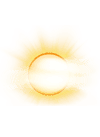

In [4]:
print html.readlines()

Wie kann man ein aber nur die Headlines aus dem ganzen HTML-Chaos herausfischen? Hier ist BeautifulSoup hilfreich. Aber man muss zunächst den ganzen HTML Code in eine "BeautifulSoup" umwandeln. Das geht so:


In [4]:
from urllib2 import urlopen

html = urlopen("http://www.nzz.ch")
soup = BeautifulSoup(html,"html.parser")
soup.prettify()

ImportError: No module named 'urllib2'

<!DOCTYPE doctype html>
 <html itemid="http://www.nzz.ch/" itemscope="" itemtype="http://schema.org/NewsArticle" lang="de"> <head><meta content="IE=edge" http-equiv="X-UA-Compatible"/> <title>NZZ News – Aktuelle Nachrichten - Neue Zürcher Zeitung</title> <script type="application/ld+json">
 {
 "@context" : "http://schema.org",
 "@type" : "Organization",
 "name" : "NZZ Neue Zürcher Zeitung",
 "url" : "http://www.nzz.ch",
 "logo" : {
 "@type": "ImageObject",
 "url": "http://www.nzz.ch/logo.png",
 "width": 413,
 "height": 60
 },
 "contactPoint" : [{
 "@type" : "ContactPoint",
 "telephone" : "+41-44-2581000",
 "contactType" : "customer service"
 }],
 "sameAs" : [ "https://www.facebook.com/nzz",
 "https://www.twitter.com/nzz",
 "https://www.youtube.com/channel/UCK1aTcR0AckQRLTlK0c4fuQ",
 "https://www.linkedin.com/company/neue-zurcher-zeitung",
 "https://plus.google.com/+nzz/",
 "http://www.freebase.com/m/041b43"]
 }
 </script><meta content="text/html; charset=utf-8" http-equiv="content-type
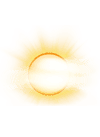

In [6]:
print soup

Das sieht jetzt nach wie vor recht unordentlich aus. Man kann das soup Objekt aber nach spezifischen HTML Tags durchsuchen (a für links, p für paragraphen, span, div, etc...)

In [7]:
print soup.find_all("h2")

[<h2 class="title title--teaser"><div class="title__catchline">Erneutes Erdbeben in Mittelitalien</div><div class="title__name">Schwere Sch\xe4den, aber bisher keine Toten</div></h2>, <h2 class="title title--teaser"><div class="title__catchline">Abstimmung \xfcber Atomausstieg</div><div class="title__name">\xabDas gibt Sch\xe4den in Milliardenh\xf6he\xbb</div></h2>, <h2 class="title title--teaser"><div class="title__catchline">Parlamentswahl in Island</div><div class="title__name">Piraten entt\xe4uschen hochgesteckte Erwartungen</div></h2>, <h2 class="title title--teaser"><div class="title__catchline">\xdcbernahmekampf um Sika</div><div class="title__name">\xabZiel ist, dass Sika das Aktienpaket der Familie \xfcbernimmt\xbb</div></h2>, <h2 class="title title--teaser"><div class="title__catchline">Bedrohte Minderheiten im Orient</div><div class="title__name">Die Meister der Balance</div></h2>, <h2 class="title title--teaser"><div class="title__catchline">\xabS\xe4uberungen\xbb in der T\

Das sind nach wie vor ganz viele h2 (headlines). Man kann die Suche aber noch weiter verfeinern. Zum Beispiel, interessieren uns nur <h2> tags, die die Klasse (class) "title" haben. 

In [9]:
results = soup.find_all("h2",{"class":"title--teaser"})

In [11]:
for result in results:
    print result.text

Erneutes Erdbeben in MittelitalienSchwere Schäden, aber bisher keine Toten
Abstimmung über Atomausstieg«Das gibt Schäden in Milliardenhöhe»
Parlamentswahl in IslandPiraten enttäuschen hochgesteckte Erwartungen
Übernahmekampf um Sika«Ziel ist, dass Sika das Aktienpaket der Familie übernimmt»
Bedrohte Minderheiten im OrientDie Meister der Balance
«Säuberungen» in der TürkeiErneut müssen Tausende von Beamten gehen
Doris LeuthardDie «Chefin»
LiteraturnobelpreisBob Dylan nimmt den Preis an
Bei den Schiiten SaudiarabiensIn der Zone des Zorns
Trumps letzte HoffnungAuf der Fährte der schweigenden Mehrheit
Clintons Mail-AffäreEin später Kick für Trump
Rückkehr von der ISSKapsel mit drei Raumfahrern auf der Erde gelandet
Krieg in JemenDutzende von Toten bei Angriff auf Rebellen-Gefängnis
Hausbrand in ZürichFeuerwehr deckt zum Löschen Dach ab
Unwetter in Ägypten26 Tote bei
Überschwemmungen
Nach gescheitertem PutschTürkei verhängt Ausreiseverbot gegen HDP-Co-Vorsitzende
NZZ-Wahl-Newsletter #8Ameri